# ⚙️ **Feature Engineering**

## 📚 Librerías

In [17]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

## ▶️ **Carga de datos**

In [18]:
file_name = '../data/raw/transport.csv'
base_path = os.getcwd()
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path)

## ⚙️ **Feature Engineering**

📣 **Variables irrelevantes**  
Vamos a eliminar la variable *temperature_c*.  
A las variables *pickup_hour* y *pickup_weekday* las vamos transformar más adelante.

In [19]:
df_fe = df.copy()

In [20]:
print(f"Correlación temperatura-duración: {df['temperature_c'].corr(df['trip_duration_min']):.3f}")
df_fe = df_fe.drop(columns=["temperature_c"])

Correlación temperatura-duración: 0.005


📣 **Franja horaria**  
Para capturar mejor las franjas horarias crearé intervalos los intervalos de tiempo: *madrugada*, *maniana*, *tarde* y *noche*.

In [21]:
def get_time_block(hour):
    if 0 <= hour <= 5:
        return "madrugada"
    elif 6 <= hour <= 11:
        return "maniana"
    elif 12 <= hour <= 17:
        return "tarde"
    else:
        return "noche"

df_fe["time_block"] = df_fe["pickup_hour"].apply(get_time_block)

In [22]:
# Codificamos la nueva variable
df_fe = pd.get_dummies(df_fe, columns=["time_block"], drop_first=True, prefix="time")

📣 **Hora cíclica**  
Para conservar la variable cíclica, crearé dos nuevas variables sin y cos.

In [23]:
df_fe["hour_sin"] = np.sin(2 * np.pi * df_fe["pickup_hour"] / 24)
df_fe["hour_cos"] = np.cos(2 * np.pi * df_fe["pickup_hour"] / 24)

df_fe = df_fe.drop(columns=["pickup_hour"])

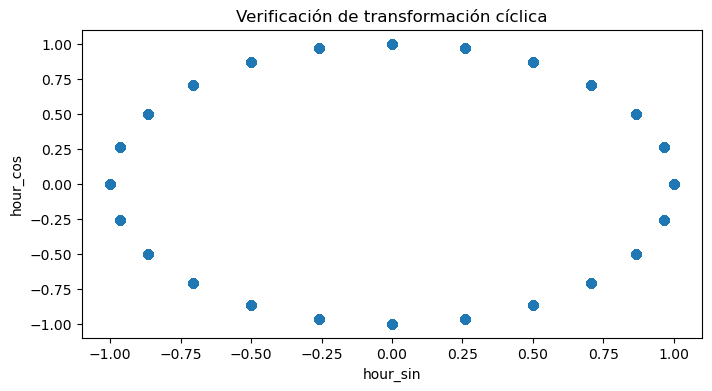

In [24]:
# Verificación de la variable cíclica
plt.figure(figsize=(8, 4))
plt.scatter(df_fe["hour_sin"], df_fe["hour_cos"], alpha=0.5)
plt.xlabel("hour_sin")
plt.ylabel("hour_cos") 
plt.title("Verificación de transformación cíclica")
plt.show()

📣 **Fin de semana**  
Para los días de la semana pasaremos a una interpretación binaria de si es o no fin de semana.  
Recordatorio: 0 = lunes.

In [25]:
df_fe["is_weekend"] = df_fe["pickup_weekday"].apply(lambda x: 1 if x >= 5 else 0)
df_fe = df_fe.drop(columns=["pickup_weekday"])

📣 **Interacción distancia × congestión**  
Para capturar el aumento de tiempo cuando los viajes son más largos y hay mucha congestión.

In [26]:
df_fe["distance_congestion"] = df_fe["trip_distance_km"] * df_fe["congestion_index"]

📣 **Lluvia binaria**  
Para saber si la lluvia afecta o no la duración. Conservaré la variable *rain_mm* porque puede aportar al modelo.

In [27]:
df_fe["rain_binary"] = df_fe["rain_mm"].apply(lambda x: 1 if x > 0 else 0)

## 💾 **Guardar el nuevo dataset**

In [28]:
df_fe.to_csv("../data/transformed/transport_fe.csv", index=True)